In [5]:
#This notebook is responsable to treat the column "Neighborhood"
import pandas as pd
import numpy as np
import seaborn as sns; sns.set() #for plot atyling
train = pd.read_csv('../data/raw/train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


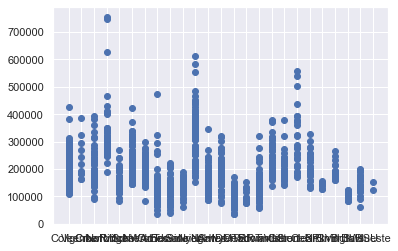

In [6]:
#Here we are plotting the data to see how is the distribution in neighborhood x sale price
import matplotlib.pyplot as plt
xs = train['Neighborhood']
ys = train['SalePrice']
plt.scatter (xs,ys)
plt.show()

In [7]:
df=train[['Neighborhood','SalePrice']]
df.head()

from sklearn.cluster import KMeans

c:\users\luisb\.virtualenvs\notebooks-ov-6zcfc\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


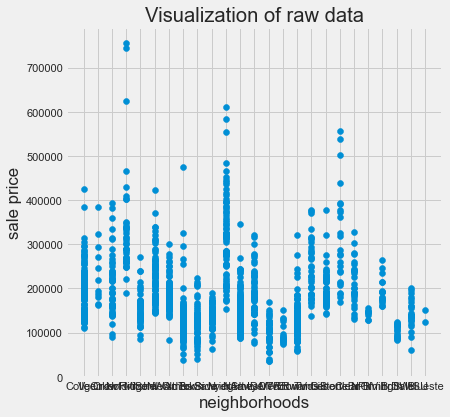

In [8]:
# Modules
from matplotlib.image import imread
import pandas as pd
import seaborn as sns
from sklearn.datasets.samples_generator import (make_blobs,make_circles,make_moons)
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score

%matplotlib inline
sns.set_context('notebook')
plt.style.use('fivethirtyeight')
from warnings import filterwarnings
filterwarnings('ignore')

# Import the data
df=train[['Neighborhood','SalePrice']]
df.head()

# Plot the data
plt.figure(figsize=(6, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1])
plt.xlabel('neighborhoods')
plt.ylabel('sale price')
plt.title('Visualization of raw data');

In [26]:
#Kmeans do not accept string as data so we are changing the classification for int variables
lista = ['NAmes','NAme','CollgCr','OldTown','NPkVill','ClearCr','Edwards','Somerst','Gilbert','NridgHt','Sawyer','NWAmes','SawyerW','BrkSide','Crawfor','Mitchel','NoRidge','Timber','IDOTRR','ClearCR','StoneBr','Blmngtn','SWISU','MeadowV','BrDale','Veenker','NPKVill','Blueste']

for index, value in enumerate(lista):
     train['Neighborhood'] = train['Neighborhood'].replace(lista, index)
        
df=train[['Neighborhood','SalePrice']]
df.head()    

,Neighborhood,SalePrice
0,0,208500
1,0,181500
2,0,223500
3,0,140000
4,0,250000


In [23]:
X = df.iloc[:, 0:2].values

In [42]:
X

array([[     0, 208500],
       [     0, 181500],
       [     0, 223500],
       ...,
       [     0, 266500],
       [     0, 142125],
       [     0, 147500]], dtype=int64)

In [43]:
kmeans = KMeans(n_clusters = 3, init = 'random')

In [44]:
kmeans.fit(X)

KMeans(init='random', n_clusters=3)

In [45]:
#This code make a count for the best cluster centers as we specified 
kmeans.cluster_centers_

array([[     0.        , 128944.19047619],
       [     0.        , 372625.94166667],
       [     0.        , 215004.37084871]])

In [46]:
distance = kmeans.fit_transform(X)
distance

array([[164125.94166667,   6504.37084871,  79555.80952381],
       [191125.94166667,  33504.37084871,  52555.80952381],
       [149125.94166667,   8495.62915129,  94555.80952381],
       ...,
       [106125.94166667,  51495.62915129, 137555.80952381],
       [230500.94166667,  72879.37084871,  13180.80952381],
       [225125.94166667,  67504.37084871,  18555.80952381]])

In [47]:
labels = kmeans.labels_
labels

array([1, 1, 1, ..., 1, 2, 2])

1 9207911334609.979
2 3610807221846.608
3 2012269498611.1506
4 1275277107546.009
5 962019138448.7034
6 624918074176.3682
7 433681070837.729
8 355963162328.79596
9 275485158818.73553
10 236658014555.28427


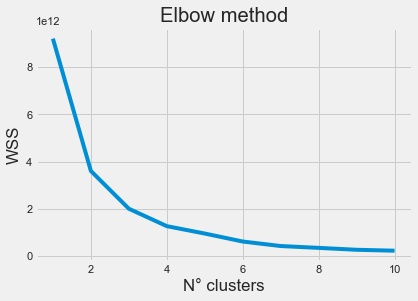

In [48]:
#This Elbow grafic especified the "best number of clusters for our data"
#In theory the average were we have the less changing is the best
#As we can see he will specify 10 clusters for our data

wcss = []
 
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random')
    kmeans.fit(X)
    print (i,kmeans.inertia_)
    wcss.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss)
plt.title('Elbow method')
plt.xlabel('N° clusters')
plt.ylabel('WSS') #within cluster sum of squares
plt.show()

In [49]:
#Here we will predict 3 random points to see how kmeans would classify them

data = [
        [ 4.12, 3.4],
        [ 5.2, 5.8],
        [ 3.1, 3.5]
    ]
kmeans.predict(data)


array([5, 5, 5])

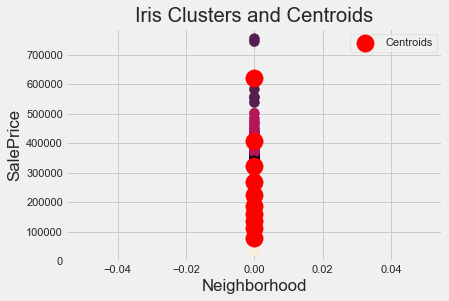

In [27]:
#Plotting the cluster centers
plt.scatter(X[:, 0], X[:,1], s = 100, c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'red',label = 'Centroids')
plt.title('Iris Clusters and Centroids')
plt.xlabel('Neighborhood')
plt.ylabel('SalePrice')
plt.legend()

plt.show()

In [51]:
#Here we will predict, from our data, how we can classify a house for his sale price em neighborhood
#Ans as we know kmeans function with the distance between the point(data) and the centers 
clusters = kmeans.predict(X)
clusters

array([8, 2, 9, ..., 7, 3, 3])

In [52]:
kmeans.cluster_centers_

array([[     0.        , 408508.85714286],
       [     0.        , 621146.375     ],
       [     0.        , 169987.33193277],
       [     0.        , 142859.93515358],
       [     0.        , 323941.44776119],
       [     0.        ,  82527.30081301],
       [     0.        , 118402.42801556],
       [     0.        , 268852.33333333],
       [     0.        , 195074.85380117],
       [     0.        , 228124.59333333]])

In [53]:
train['Cluster Neighborhood'] = clusters

In [54]:
train.drop('Neighborhood',axis=1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Cluster Neighborhood
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,8
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,2
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,9
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,3
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,8,2007,WD,Normal,175000,2
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000,8
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500,7
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2010,WD,Normal,142125,3


Explain the Kmeans and the aplication

Kmeans is a unsupervised method of clustering
1 Knowledge of the points distribution;
2 Simulation of centroid through the distribution of points;
3 Calculation of the distance from the points to the centroid for clustering

Conclusion
As we can see in the application, our data still is clustered by the neighborhood and sale price, 
but sale price is the target from the next data frame, that is what we must calculate. 
So we dont have good variables to applie with "Neighborhood" that make a clustering to simplified this column.

To guidance, examples and more explenation you can see the links:

link 1: https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a
link 2: https://medium.com/@paulo_sampaio/entendendo-k-means-agrupando-dados-e-tirando-camisas-e90ae3157c17/ 